In [25]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from citipy import citipy
from config import weather_api_key
import time
from datetime import datetime

In [2]:
#create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000,high=90.000,size=1500)
lngs = np.random.uniform(low=-180.000,high=180.000,size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
#create a list for holding the cities.
cities = []
#identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
#print the city count to confirm sufficient count.
len(cities)

614

In [5]:
#create an empty list to hold the weather data
city_data = []
#print the beginning of the logging
print("Beginning Data Retrievel                                            ")
print("--------------------------------------------------------------------")

#create counters
record_count = 1
set_count = 1

#starting URL for weather map API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

Beginning Data Retrievel                                            
--------------------------------------------------------------------


In [6]:
#loop through all the cities in our list
for i, city in enumerate(cities):
    #group cities in sets of 50 for logging purposes:
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    #create endpoint url with each city
    city_url = url + "&q=" + city.replace(" ","+")
    #log the url, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #add 1 to the record count
    record_count += 1
#run an api request for each of the cities
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 2 of Set 1 | barrow
Processing Record 3 of Set 1 | khatanga
Processing Record 4 of Set 1 | tazovskiy
Processing Record 5 of Set 1 | grande-riviere
City not found. Skipping...
Processing Record 6 of Set 1 | bluff
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | labuhan
Processing Record 9 of Set 1 | moosomin
Processing Record 10 of Set 1 | atuona
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | kodiak
Processing Record 13 of Set 1 | kismayo
Processing Record 14 of Set 1 | marrakesh
Processing Record 15 of Set 1 | brokopondo
Processing Record 16 of Set 1 | sioux lookout
Processing Record 17 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | nemuro
Processing Record 20 of Set 1 | port elizabeth
Processing Record 21 of Set 1 | noumea
Processing Record 22 of Set 1 | muros
Processi

Processing Record 38 of Set 4 | honningsvag
Processing Record 39 of Set 4 | zlobin
Processing Record 40 of Set 4 | chokurdakh
Processing Record 41 of Set 4 | qaanaaq
Processing Record 42 of Set 4 | cascais
Processing Record 43 of Set 4 | dzhusaly
City not found. Skipping...
Processing Record 44 of Set 4 | ambovombe
Processing Record 45 of Set 4 | brigantine
Processing Record 46 of Set 4 | carinhanha
Processing Record 47 of Set 4 | mangit
Processing Record 48 of Set 4 | domoni
Processing Record 49 of Set 4 | qui nhon
Processing Record 50 of Set 4 | calvinia
Processing Record 1 of Set 5 | macaboboni
City not found. Skipping...
Processing Record 2 of Set 5 | poya
Processing Record 3 of Set 5 | sarai
Processing Record 4 of Set 5 | kahului
Processing Record 5 of Set 5 | guerrero negro
Processing Record 6 of Set 5 | papillion
Processing Record 7 of Set 5 | polewali
Processing Record 8 of Set 5 | maningrida
Processing Record 9 of Set 5 | kalakamati
Processing Record 10 of Set 5 | kerki
City n

Processing Record 29 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 30 of Set 8 | hofn
Processing Record 31 of Set 8 | riedlingen
Processing Record 32 of Set 8 | deputatskiy
Processing Record 33 of Set 8 | ohara
Processing Record 34 of Set 8 | mahuva
Processing Record 35 of Set 8 | groa
Processing Record 36 of Set 8 | lekoni
Processing Record 37 of Set 8 | mount isa
Processing Record 38 of Set 8 | puno
Processing Record 39 of Set 8 | dandong
Processing Record 40 of Set 8 | namie
Processing Record 41 of Set 8 | alindao
Processing Record 42 of Set 8 | egvekinot
Processing Record 43 of Set 8 | torquay
Processing Record 44 of Set 8 | staroutkinsk
Processing Record 45 of Set 8 | phan thiet
Processing Record 46 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 47 of Set 8 | san cristobal
Processing Record 48 of Set 8 | cidreira
Processing Record 49 of Set 8 | tingrela
City not found. Skipping...
Processing Record 50 of Set 8 | gaogou
Processing Record 1

Processing Record 18 of Set 12 | buon me thuot
City not found. Skipping...
Processing Record 19 of Set 12 | leshukonskoye
Processing Record 20 of Set 12 | budogoshch
Processing Record 21 of Set 12 | slavutych
Processing Record 22 of Set 12 | marawi
Processing Record 23 of Set 12 | belyy yar
Processing Record 24 of Set 12 | nouadhibou
Processing Record 25 of Set 12 | mega
Processing Record 26 of Set 12 | deoband
Processing Record 27 of Set 12 | tiarei
Processing Record 28 of Set 12 | kalmunai
Processing Record 29 of Set 12 | manokwari
Processing Record 30 of Set 12 | chulman
Processing Record 31 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 32 of Set 12 | sanmenxia
Processing Record 33 of Set 12 | mitsamiouli
Processing Record 34 of Set 12 | teguldet
Processing Record 35 of Set 12 | moose factory
Processing Record 36 of Set 12 | culebra
Processing Record 37 of Set 12 | luba
Processing Record 38 of Set 12 | achisay
City not found. Skipping...
Processing Record 39 of

In [7]:
#convert the array of dictionaries to a dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Barrow,71.2906,-156.7887,18.30,90,100,13.04,US,2022-05-06 02:56:47
1,Khatanga,71.9667,102.5000,19.99,84,48,16.46,RU,2022-05-06 02:56:48
2,Tazovskiy,67.4667,78.7000,14.86,82,9,11.10,RU,2022-05-06 02:56:49
3,Bluff,-46.6000,168.3333,59.63,76,100,5.32,NZ,2022-05-06 02:56:49
4,Busselton,-33.6500,115.3333,63.25,48,0,13.15,AU,2022-05-06 02:56:50
5,Labuhan,-6.8844,112.2051,85.39,70,18,4.68,ID,2022-05-06 02:48:15
6,Moosomin,50.1333,-101.6677,58.46,64,92,12.86,CA,2022-05-06 02:56:51
7,Atuona,-9.8000,-139.0333,78.98,74,97,14.41,PF,2022-05-06 02:56:52
8,Jamestown,42.0970,-79.2353,55.06,62,100,1.01,US,2022-05-06 02:56:52
9,Kodiak,57.7900,-152.4072,41.13,89,98,10.11,US,2022-05-06 02:56:19


In [8]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Barrow,US,2022-05-06 02:56:47,71.2906,-156.7887,18.30,90,100,13.04
1,Khatanga,RU,2022-05-06 02:56:48,71.9667,102.5000,19.99,84,48,16.46
2,Tazovskiy,RU,2022-05-06 02:56:49,67.4667,78.7000,14.86,82,9,11.10
3,Bluff,NZ,2022-05-06 02:56:49,-46.6000,168.3333,59.63,76,100,5.32
4,Busselton,AU,2022-05-06 02:56:50,-33.6500,115.3333,63.25,48,0,13.15


In [9]:
#create the output file (CSV)
output_data_file = "weather_data/cities.csv"
#export the city_data into a csv
city_data_df.to_csv(output_data_file,index_label="City=ID")

In [10]:
#extract relevant fields from the df for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Humidity"]
wind_speed = city_data_df["Wind Speed"]

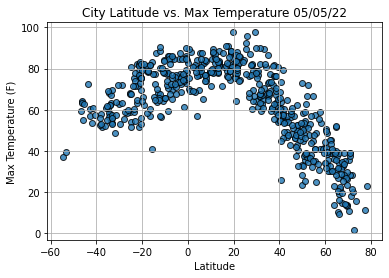

In [11]:
#import time module
import time
#build the scatter plot for latitude vs max temperature
plt.scatter(lats,
           max_temps,
           edgecolor="black",linewidths=1,marker="o",
           alpha=0.8,label="Cities")
#format graph
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
#save the figure
plt.savefig("weather_data/Fig1.png")
plt.show()

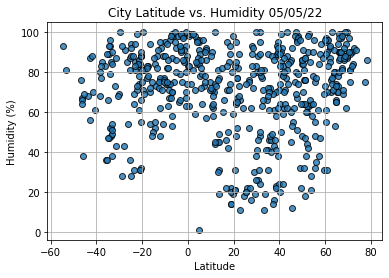

In [12]:
#build the scatter plot for latitude vs humidity
plt.scatter(lats,
           humidity,
           edgecolor="black",linewidths=1,marker="o",
           alpha=0.8,label="Cities")
#format graph
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
#save the figure
plt.savefig("weather_data/Fig2.png")
plt.show()

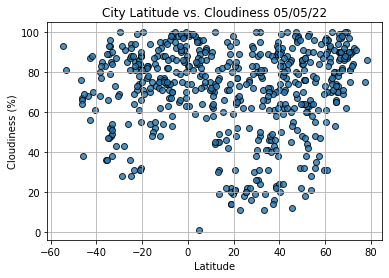

In [13]:
#build the scatter plot for latitude vs cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor="black",linewidths=1,marker="o",
           alpha=0.8,label="Cities")
#format graph
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
#save the figure
plt.savefig("weather_data/Fig3.png")
plt.show()

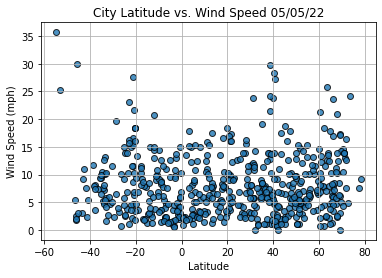

In [14]:
#build the scatter plot for latitude vs wind speed
plt.scatter(lats,
           wind_speed,
           edgecolor="black",linewidths=1,marker="o",
           alpha=0.8,label="Cities")
#format graph
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
#save the figure
plt.savefig("weather_data/Fig4.png")
plt.show()

In [15]:
#import linregress
from scipy.stats import linregress

#create a function to perform linear regression on the weather data and plot a regression line and the equation with the data
def plot_linear_regression(x_values,y_values,title,y_label,text_coordinates):
    #run regression on hemisphere weather data
    (slope,intercept,r_value,p_value,std_err)=linregress(x_values,y_values)
    
    #calculate the regression line 'y values' from the slope and intercept
    regress_values = x_values*slope + intercept
    #get the equation of the line
    line_eq = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))
    #create a scatter plot and plot the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    #annotate the text for the line equation
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()

In [16]:
#create northern and southern hemisphere dataframes
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>=0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]<0)]

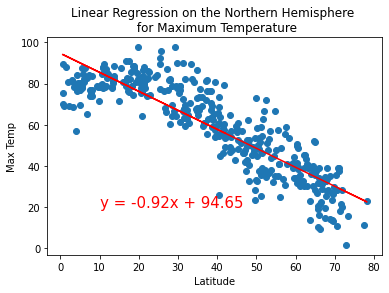

In [17]:
#linear regression on the northern hemisphere (max temp)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
#call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,20))

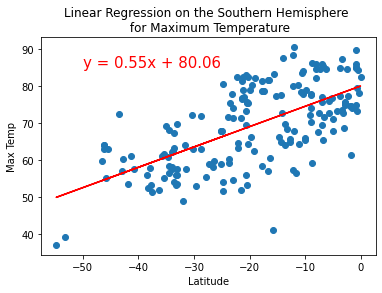

In [18]:
#linear regression on the southern hemisphere (max temp)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
#call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,85))

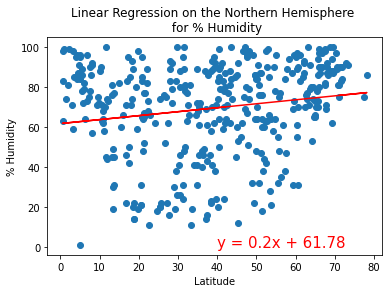

In [19]:
#linear regression on the northern hemisphere (humidity)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
#call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,0))

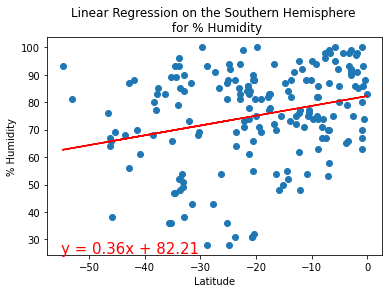

In [20]:
#linear regression on the southern hemisphere (humidity)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
#call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-55,25))

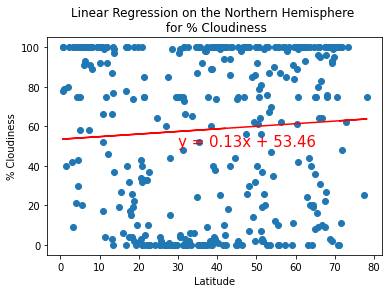

In [21]:
#linear regression on the northern hemisphere (cloudiness)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
#call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(30,50))

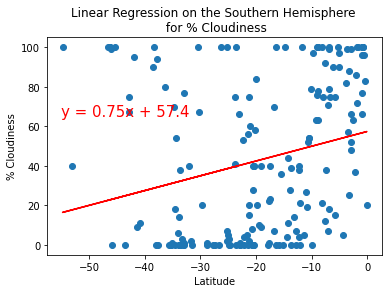

In [22]:
#linear regression on the southern hemisphere (cloudiness)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
#call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-55,65))

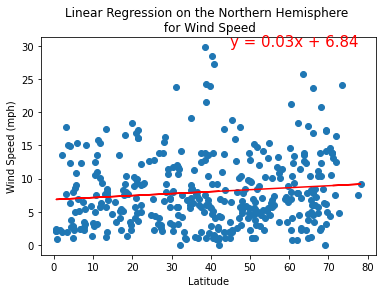

In [23]:
#linear regression on the northern hemisphere (wind speed)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
#call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed (mph)',(45,30))

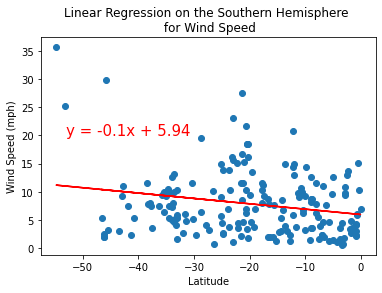

In [24]:
#linear regression on the southern hemisphere (wind speed)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
#call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed (mph)',(-53,20))